In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
# import datetime

In [3]:
def proportion_hipotesis_test(p1, n1, grupo1, p2, n2, grupo2, a = .05, verbose=True):
    ## efeito sempre positivo, então
    ## p1-p2 >= 0, então
    ## p1 >= p2, então
    ## teste de hipotese unicaudal a direita p1 > p2

    # 0. definindo variaveis
    # n1 = n1
    x1 = p1*n1
    # p1 = p1

    # n2 = n2
    x2 = p2*n2
    # p2 = p2

    p = (x1+x2)/(n1+n2)

    # 1. hipoteses:
    # h0. p1 <= p2
    # ha. p1 > p2
    
    print(f'''
    p1: {p1}, p2: {p2}

    h0. p1 <= p2
    ha. p1 > p2
    ''') if verbose else None

    # 2. z-statistic:
    z = (p1-p2)/(( p*(1-p)*((1/n1)+(1/n2))  )**(1/2))

    # 3.1. comparar z-statistic com z-critico:
    z_critico = scipy.stats.norm.ppf(1-a)
    print('i.', 'h0 rejeitada' if z >= z_critico else 'h0 aceita', f'-- z-statistic: {z}, z-critico: {z_critico}') if verbose else None

    # 3.2. comparar p-value com alpha:
    p = 1-scipy.stats.norm.cdf(z)
    print('ii.', 'h0 rejeitada' if p <= a else 'h0 aceita', f'-- p-value: {p}, alpha: {a}') if verbose else None

    return z, p, f'(p1:{grupo1}:{p1}, p2:{grupo2}:{p2})', f'accepted with {1-a} confidence: p1 > p2 i.e. p{grupo1} > p{grupo2}' if p <= a else f'accepted with {1-a} confidence: p1 <= p2 i.e. p{grupo1} <= p{grupo2}'

In [9]:
df_customer_churn_with_months = pd.read_csv('./data/business case - churn/customer_churn_with_months.csv')

## limpando dados
df_customer_churn_with_months.columns = [x.strip() for x in df_customer_churn_with_months.columns]
df_customer_churn_with_months = df_customer_churn_with_months.drop_duplicates()
df_customer_churn_with_months['mes_churn'] = pd.to_datetime(df_customer_churn_with_months['mes_churn'], format='%m/%Y').dt.to_period('M')

print(df_customer_churn_with_months.shape)
display(
    pd.DataFrame({
        'Tipo': df_customer_churn_with_months.dtypes,
        'Qtde nulos': df_customer_churn_with_months.isnull().sum(),
        'Proporção nulos': df_customer_churn_with_months.isnull().mean(),
        'Qtde unicos': df_customer_churn_with_months.nunique(),
        'Exemplo unicos': df_customer_churn_with_months.apply(lambda x: x.unique()[:3])
    })
)

# df_customer_churn_with_months.sample().iloc[0]

(7043, 23)


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
ID,int64,0,0.000000,7043,"[1, 2, 4]"
Tipo de empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
Fundação da empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
Possui mais de um sócio,object,0,0.000000,2,"[Sim, Não]"
Funcionários,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
Meses de permanência,int64,0,0.000000,73,"[1, 34, 45]"
Utiliza serviços financeiros,object,0,0.000000,2,"[Não, Sim]"
PossuiContador,object,682,0.096834,2,"[nan, Não , Sim]"
Faz conciliação bancária,object,0,0.000000,3,"[automática, manual, não faz]"
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


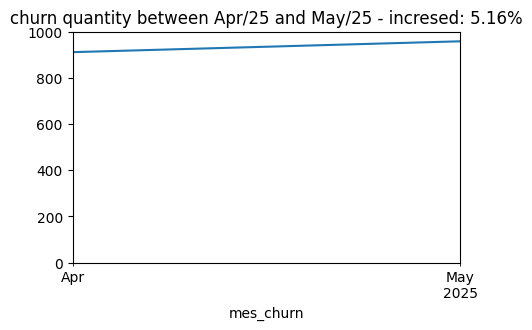


 h0. pMaio <= pAbril
 ha. pMaio > pAbril

i. h0 rejeitada -- z-statistic: 2.2505960629004105, z-critico: 1.6448536269514722
ii. h0 rejeitada -- p-value: 0.012205566507976662, alpha: 0.05

* com um nivel de confiança de 0.95 aceitamos a hipotese alternativa, sendo assim o aumento do churn entre Apr/25 e May/25 é significativo. *


In [4]:
## aqui conseguimos ver que a a quantidade de churn aumentou 5.16% comparado com o mês anterior, e iremos fazer um teste de hipoteses para saber se esse aumento é estatisticamente significativo.

plt.close('all')
_, ax = plt.subplots(1, figsize=(5, 3))

delta = round((df_customer_churn_with_months['mes_churn'].value_counts().values[0]/df_customer_churn_with_months['mes_churn'].value_counts().values[1]-1)*100, 2)
df_customer_churn_with_months['mes_churn'].value_counts().plot.line(title=f'churn quantity between Apr/25 and May/25 - incresed: {delta}%', ax=ax)

plt.ylim(bottom=0, top=1000)
plt.show()

## -- teste de hipoteses --
# 0. variaveis:
n1 = df_customer_churn_with_months[df_customer_churn_with_months['mes_churn'] != '2025-04'].shape[0]
x1 = df_customer_churn_with_months[df_customer_churn_with_months['mes_churn'] == '2025-05'].shape[0]
p1 = x1/n1

n2 = df_customer_churn_with_months[df_customer_churn_with_months['Meses de permanência'] > 1].shape[0]
x2 = df_customer_churn_with_months[df_customer_churn_with_months['mes_churn'] == '2025-04'].shape[0]
p2 = x2/n2

p = (x1+x2)/(n1+n2)
a = .05

# 1. hipoteses:
# h0. pMaio <= pAbril
# ha. pMaio > pAbril
print('''
 h0. pMaio <= pAbril
 ha. pMaio > pAbril
''')

# 2. z-statistic:
z = (p1-p2)/(( p*(1-p)*((1/n1)+(1/n2))  )**(1/2))

# 3.1. comparar z-statistic com z-critico:
z_critico = scipy.stats.norm.ppf(1-a)
print('i.', 'h0 rejeitada' if z >= z_critico else 'h0 aceita', f'-- z-statistic: {z}, z-critico: {z_critico}')

# 3.2. comparar p-value com alpha:
p = 1-scipy.stats.norm.cdf(z)
print('ii.', 'h0 rejeitada' if p <= a else 'h0 aceita', f'-- p-value: {p}, alpha: {a}')

# 4. conclusão:
print(f'\n* com um nivel de confiança de {1-a} aceitamos a hipotese alternativa, sendo assim o aumento do churn entre Apr/25 e May/25 é significativo. *' if p <= a else '--')

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Sim,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


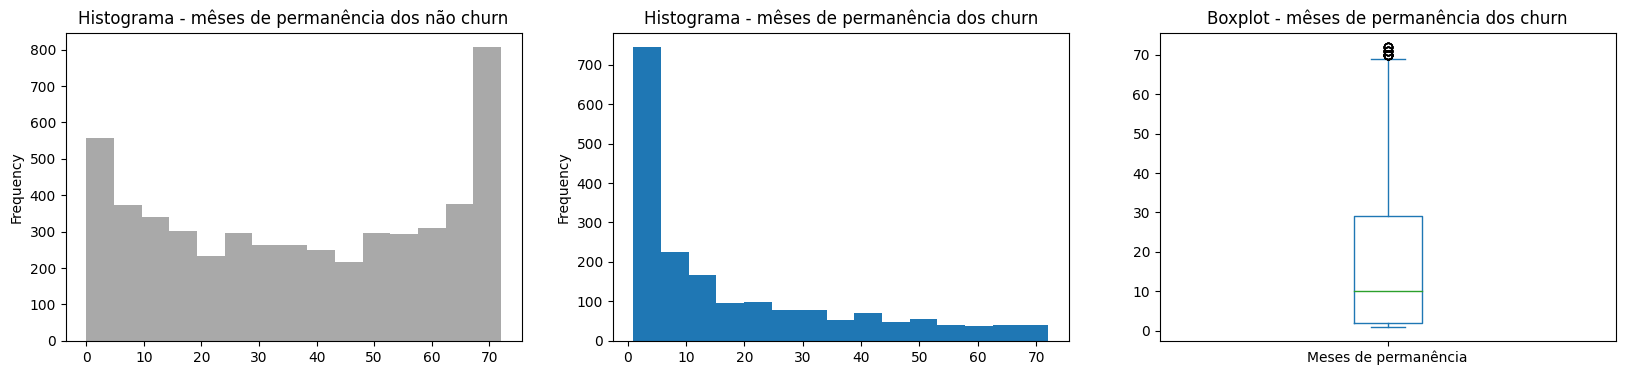


insights:
1. existe uma probabilidade de 50% de alguem ser churn em no maximo 10 mêses <-> 50% dos churns duraram de 1 a 10 mêses em contrato.
      -> recomendação: tratamento "exclusivo" nos 10 primeiros mêses de contrato.



In [203]:
# i. existe alguma relação entre Meses de permanência e Churn?
display(df_customer_churn_with_months.groupby('Churn')['Meses de permanência'].describe())

plt.close('all')
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

df_customer_churn_with_months[df_customer_churn_with_months['Churn'] == 'Não']['Meses de permanência'].plot.hist(ax=ax[0], bins=15, title='Histograma - mêses de permanência dos não churn', color='darkgray')
df_customer_churn_with_months[df_customer_churn_with_months['Churn'] == 'Sim']['Meses de permanência'].plot.hist(ax=ax[1], bins=15, title='Histograma - mêses de permanência dos churn')
df_customer_churn_with_months[df_customer_churn_with_months['Churn'] == 'Sim']['Meses de permanência'].plot.box(ax=ax[2], title='Boxplot - mêses de permanência dos churn')

plt.show()

### insights:
print('''
insights:
1. existe uma probabilidade de 50% de alguem ser churn em no maximo 10 mêses <-> 50% dos churns duraram de 1 a 10 mêses em contrato.
      -> recomendação: tratamento "exclusivo" nos 10 primeiros mêses de contrato.
''')

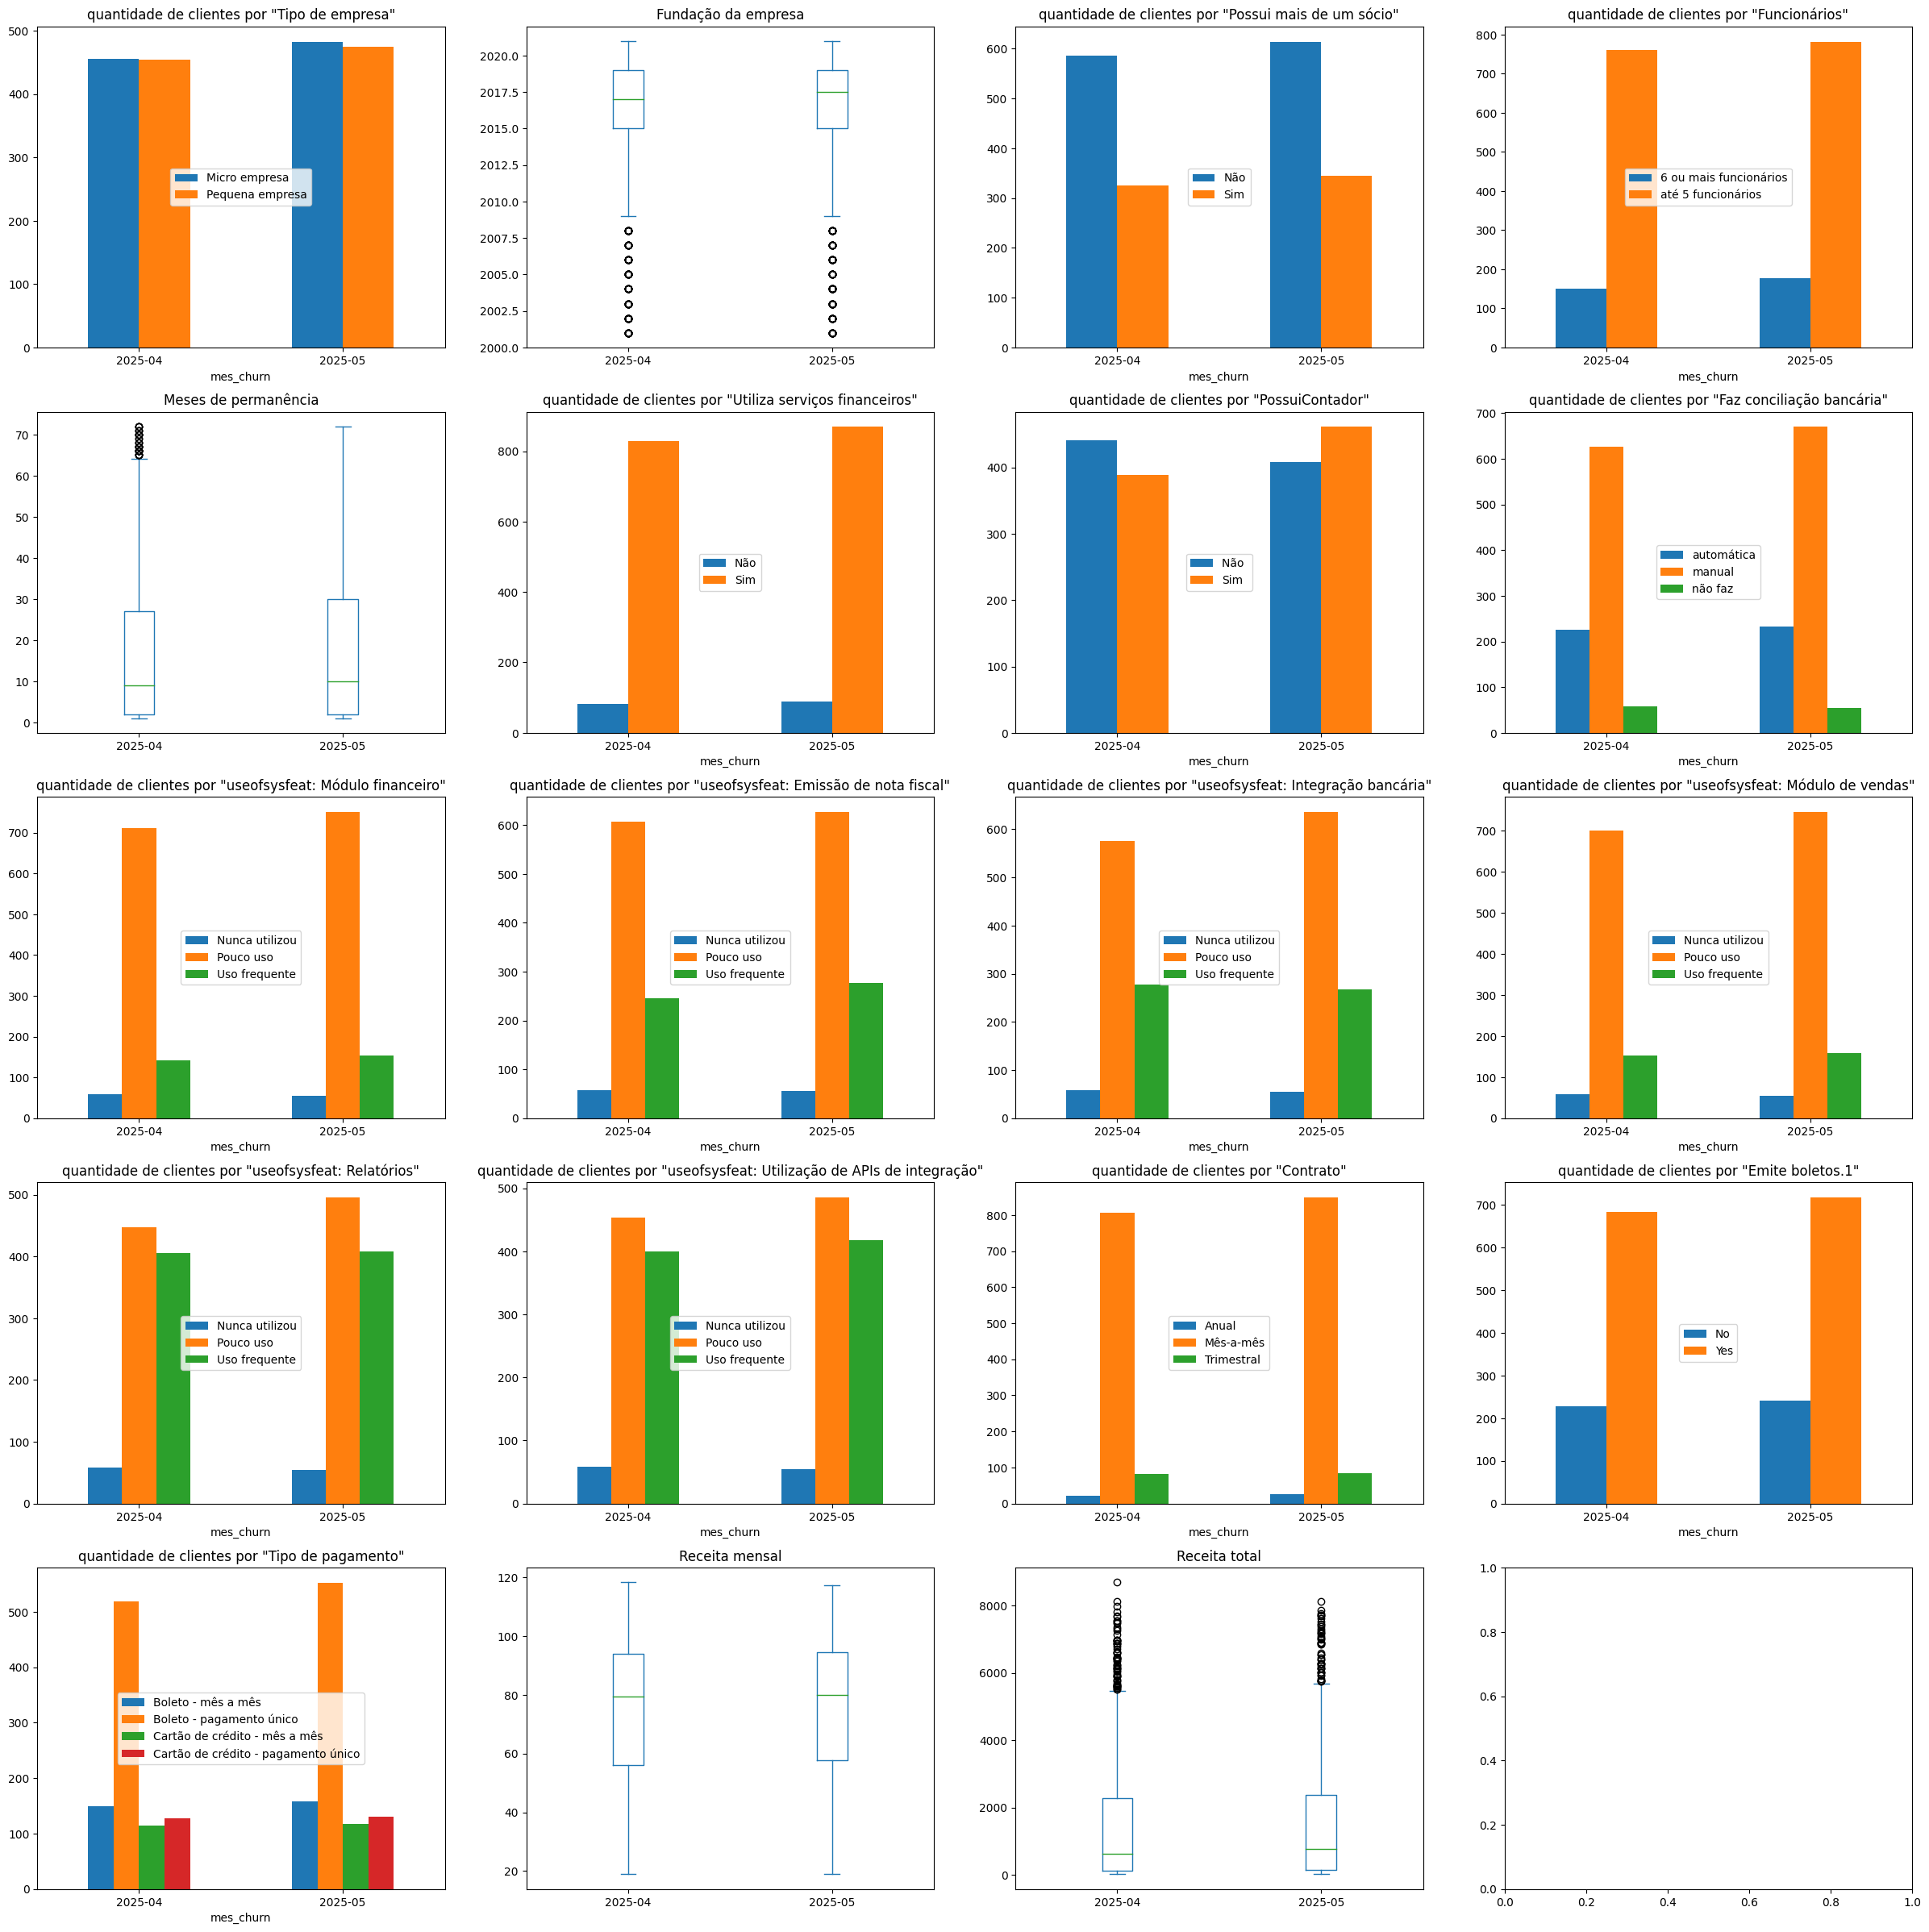


insights:
1. os churns de Abr/25 e May/25 possuem comportamento semelhante no geral.
2. com uma diferença pequena, em Abr/25 a quantidade de empresas sem contador era maior do que com contador e tal comparação se inverte em May/25.



In [189]:
# ii. qual o perfil dos clientes com churn em Abr e May?

df = df_customer_churn_with_months[df_customer_churn_with_months['Churn'] == 'Sim']

plt.close('all')
nlines = int(np.ceil((len(df.columns[1:].drop(['Churn','mes_churn','Emite boletos']))-1)/4))
fig, ax = plt.subplots(nlines, 4, figsize=(30, 6*nlines))
#### 04/2025 versus 05/2025 -> df[df['mes_churn'] == '04/2025'], df[df['mes_churn'] == '05/2025']

row, column = 0, 0
for col in df.columns[1:].drop(['Churn','mes_churn','Emite boletos']):
    col_name = f"useofsysfeat: {col.split(':')[1].strip()}" if ':' in col else col

    if df[col].dtype == object:
        df.groupby(['mes_churn', col])['ID'].count().reset_index().pivot_table(index='mes_churn', columns=col, values='ID').plot.bar(rot=0, ax=ax[row][column], title=f'quantidade de clientes por "{col_name}"')
        ax[row][column].legend(loc='center')
    elif df[col].dtype == np.int64 or df[col].dtype == np.float64:
        df[['mes_churn',col]].plot.box(ax=ax[row][column], by='mes_churn', column=col)
    else:    
        print(col, df[col].dtype)

    row = row+1 if column == 3 else row
    column = column+1 if column < 3 else 0

plt.show()

print('''
insights:
1. os churns de Abr/25 e May/25 possuem comportamento semelhante no geral.
2. com uma diferença pequena, em Abr/25 a quantidade de empresas sem contador era maior do que com contador e tal comparação se inverte em May/25.
''')

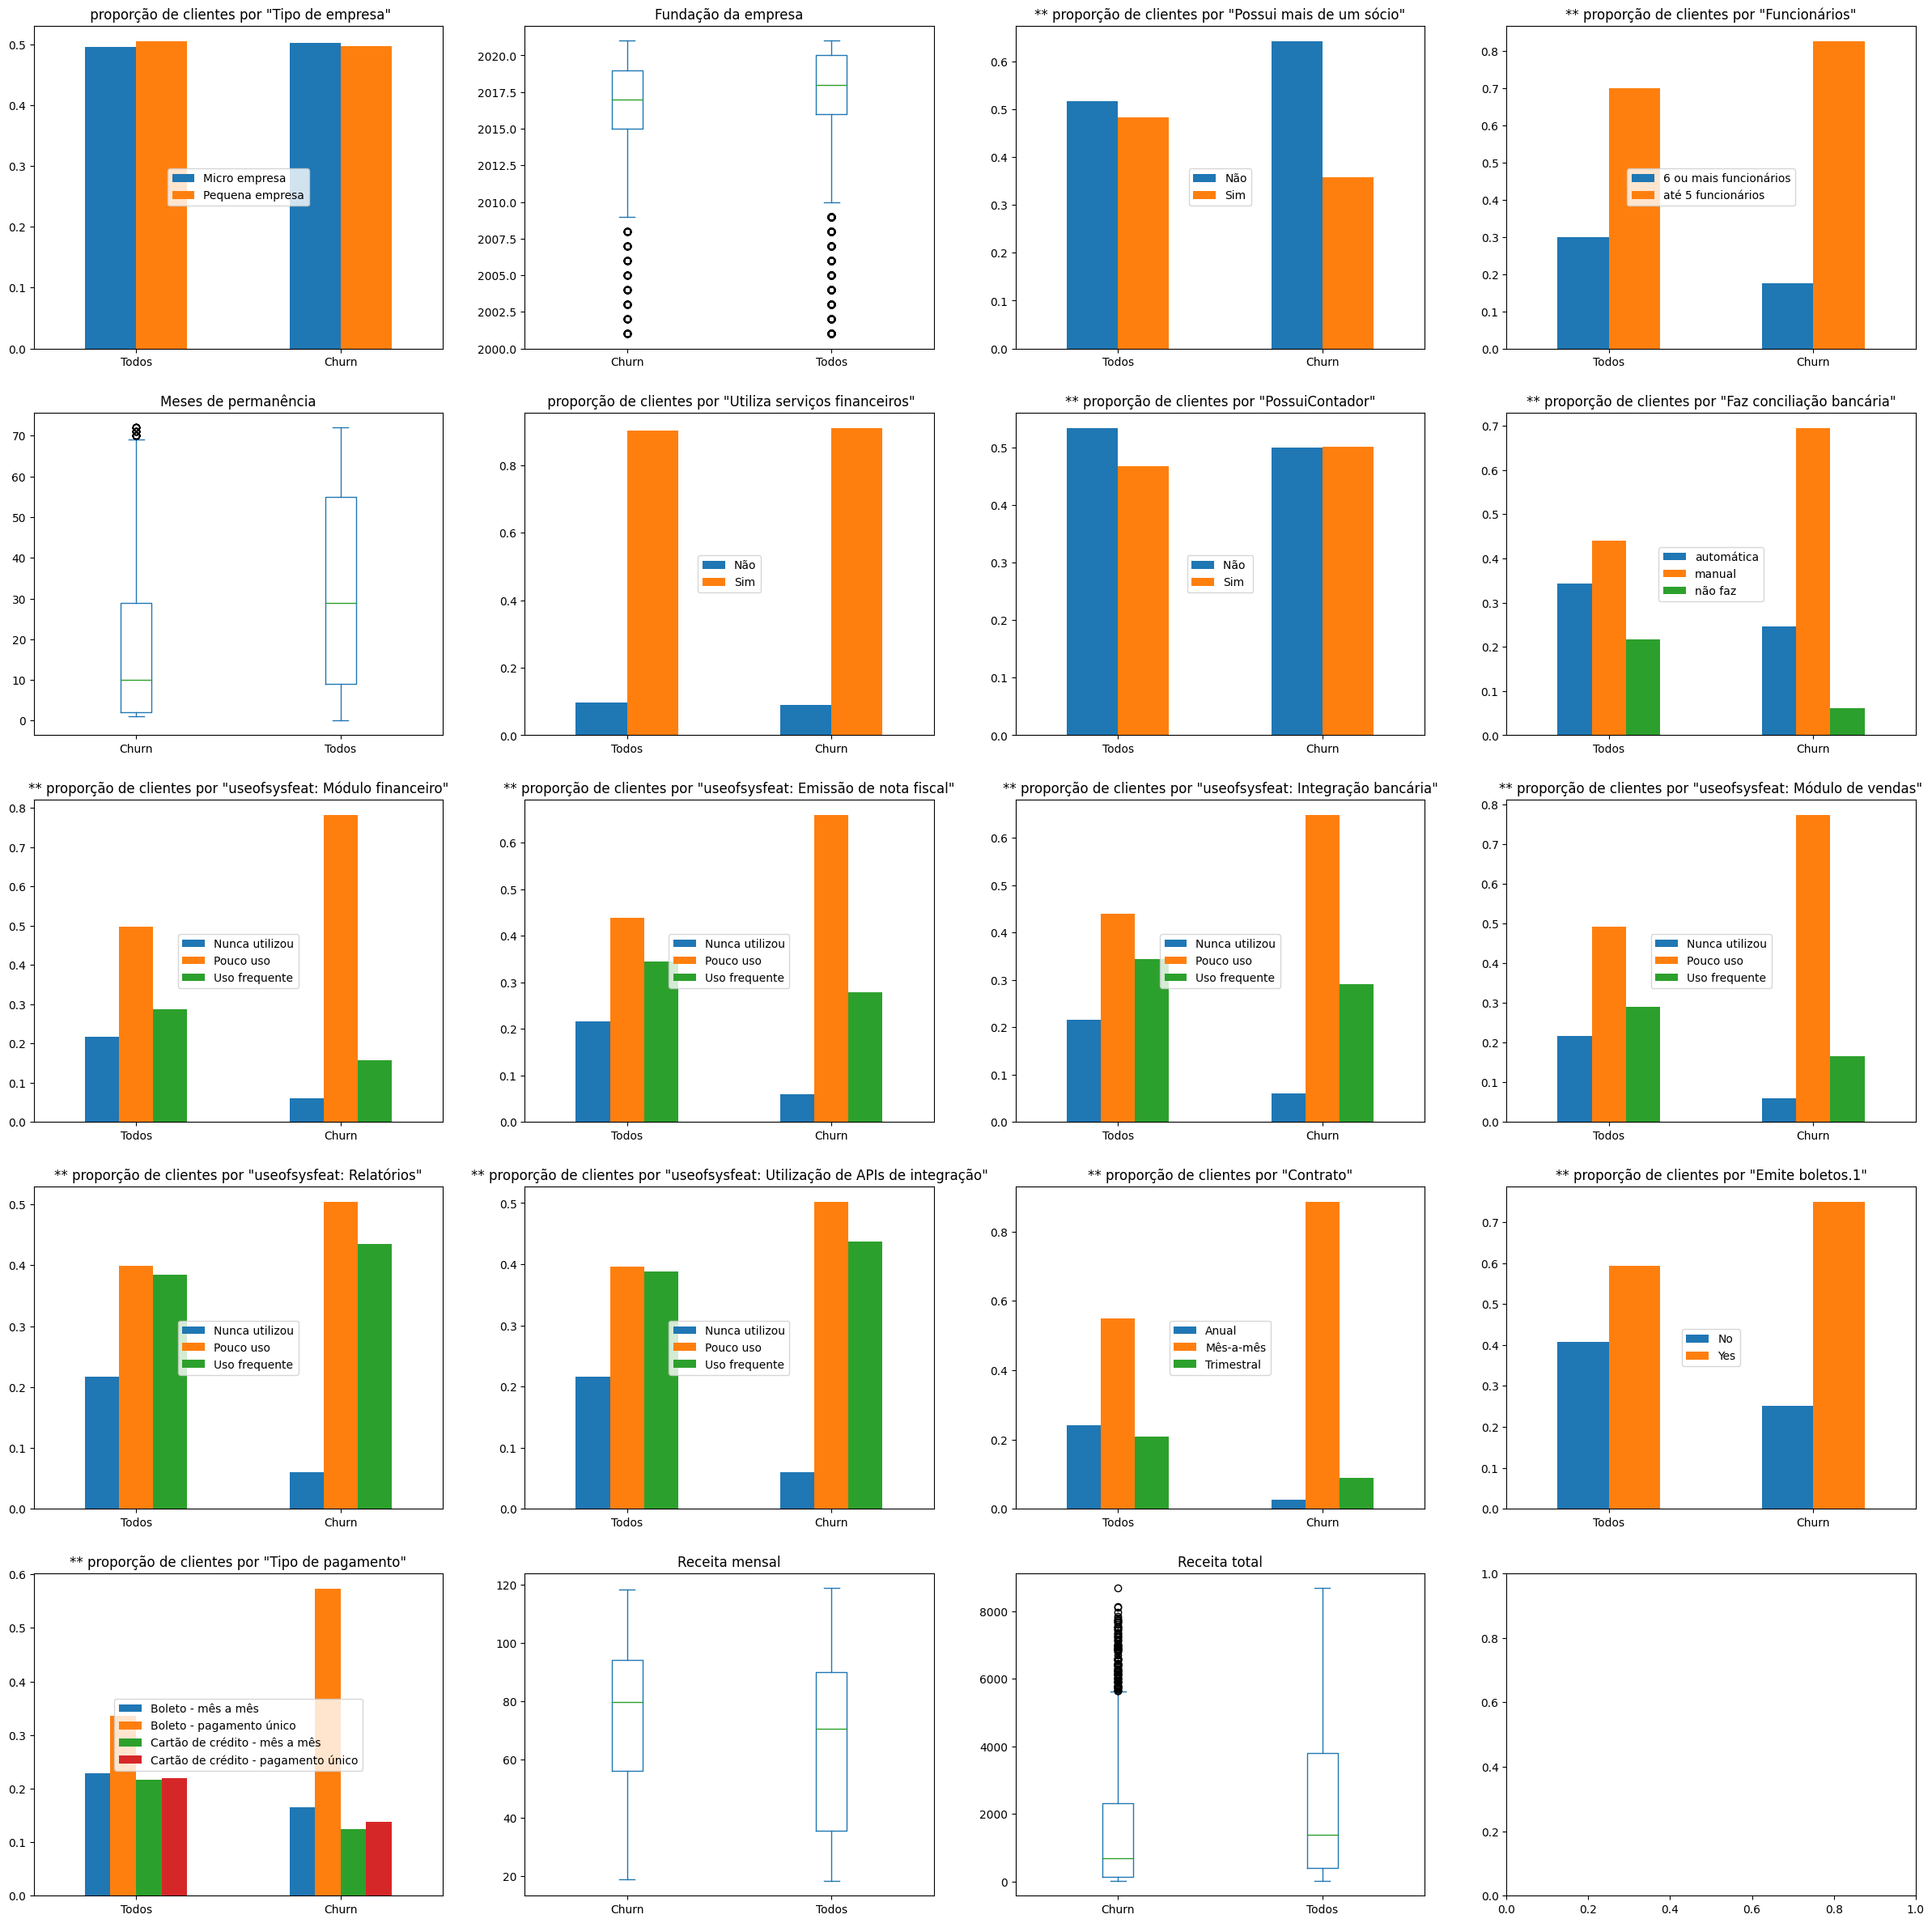

-- insights -- 

1. individualmente tais caracteristicas aumenta a chance do Churn acontecer:
Possui mais de um sócio = Não
Funcionários = até 5 funcionários
PossuiContador = Sim
Faz conciliação bancária = manual
Frequência de utilização de feature do sistema: Módulo financeiro = Pouco uso
Frequência de utilização de feature do sistema: Emissão de nota fiscal = Pouco uso
Frequência de utilização de feature do sistema: Integração bancária = Pouco uso
Frequência de utilização de feature do sistema: Módulo de vendas = Pouco uso
Frequência de utilização de feature do sistema: Relatórios = Pouco uso
Frequência de utilização de feature do sistema: Relatórios = Uso frequente
Frequência de utilização de feature do sistema: Utilização de APIs de integração = Pouco uso
Frequência de utilização de feature do sistema: Utilização de APIs de integração = Uso frequente
Contrato = Mês-a-mês
Emite boletos.1 = Yes
Tipo de pagamento = Boleto - pagamento único

2. individualmente tais caracteristicas dimi

In [206]:
# ii. qual o perfil dos clientes todos vs churns?
# comparar proporções para todas as variaveis (colunas)

df = df_customer_churn_with_months

n_todos = df.shape[0]
n_churns = df[df['Churn']=='Sim'].shape[0]

plt.close('all')
nlines = int(np.ceil((len(df.columns[1:].drop(['Churn','mes_churn','Emite boletos']))-1)/4))
fig, ax = plt.subplots(nlines, 4, figsize=(30, 6*nlines))
#### todos versus churn -> df, df[df['Churn'] == 'Sim']

rejected_hipotesis = {}

row, column = 0, 0
for col in df.columns[1:].drop(['Churn','mes_churn','Emite boletos']):
    col_name = f"useofsysfeat: {col.split(':')[1].strip()}" if ':' in col else col

    if df[col].dtype == object:
        df_target_todos =  df.groupby(col)['ID'].count().reset_index(name='Todos')
        df_target_todos['Todos'] = df_target_todos['Todos']/df_target_todos['Todos'].sum()
        df_target_churn =  df[df['Churn'] == 'Sim'].groupby(col)['ID'].count().reset_index(name='Churn')
        df_target_churn['Churn'] = df_target_churn['Churn']/df_target_churn['Churn'].sum()
        
        df_target = pd.merge(df_target_todos, df_target_churn, on=col, how='outer').fillna(0)
        df_target.index = df_target[col]
        df_target = df_target.drop(col, axis=1).T

        for coll in df_target.columns:
            p_todos = df_target[coll]['Todos']
            p_churns = df_target[coll]['Churn']
            
            p1 = p_churns; n1 = n_churns; grupo1 = 'Churns'
            p2 = p_todos; n2 = n_todos; grupo2 = 'Todos'
            if p_todos >= p_churns:
                p1 = p_todos; n1 = n_todos; grupo1 = 'Todos'
                p2 = p_churns; n2 = n_churns; grupo2 = 'Churns'

            _, p_value, props, msg = proportion_hipotesis_test(p1, n1, grupo1, p2, n2, grupo2, verbose=False)

            graph_have_significant_changes = False
            if '=' not in msg:
                rejected_hipotesis[col] = {} if col not in list(rejected_hipotesis.keys()) else rejected_hipotesis[col]
                rejected_hipotesis[col][coll] = (p_value, props, msg)
                graph_have_significant_changes = True

        df_target.plot.bar(rot=0, ax=ax[row][column], title=f'{"**" if graph_have_significant_changes else ""} proporção de clientes por "{col_name}"')
        ax[row][column].legend(loc='center')
    elif df[col].dtype == np.int64 or df[col].dtype == np.float64:
        df_target_todos = df[[col]].copy()
        df_target_todos['Grupo'] = 'Todos'
        df_target_churn = df[df['Churn'] == 'Sim'][[col]].copy()
        df_target_churn['Grupo'] = 'Churn'
        df_target = pd.concat([df_target_todos, df_target_churn])

        df_target.plot.box(ax=ax[row][column], by='Grupo', column=col)
    else:    
        print(col, df[col].dtype)

    row = row+1 if column == 3 else row
    column = column+1 if column < 3 else 0

plt.show()

# print('-- hipotesis tests --', '\n')
assosiacao_positiva_churn = []
assosiacao_negativa_churn = []
for col in list(rejected_hipotesis.keys()):
    # print(f'{col.strip()}: ')
    for coll in list(rejected_hipotesis[col].keys()): 
        # print(f'- {coll.strip()}: {rejected_hipotesis[col][coll][-1]}, p-value: {rejected_hipotesis[col][coll][0]}')
        if 'pChurns > pTodos' in rejected_hipotesis[col][coll][-1]:
            assosiacao_positiva_churn.append(f'{col} = {coll}')
        else:
            assosiacao_negativa_churn.append(f'{col} = {coll}')

print('-- insights --', '\n')

print('1. individualmente tais caracteristicas aumenta a chance do Churn acontecer:')
for assosiacao in assosiacao_positiva_churn: print(assosiacao)
print()
print('2. individualmente tais caracteristicas diminue a chance do Churn acontecer:')
for assosiacao in assosiacao_negativa_churn: print(assosiacao)

print('''
      -> recomendações: 
            atacar mais clientes cuja as caracteristicas são de diminuir a chance do Churn acontecer e
            atacar menos ou mudar o tratamento para clientes cuja as caracteristicas são de aumentar a chance do Churn acontecer
''')